### L1/2 Regularization

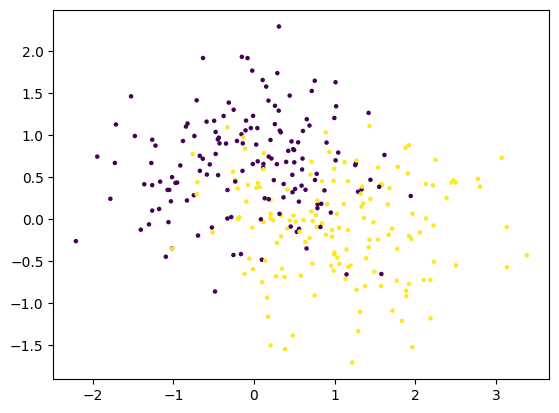

In [155]:
from sklearn.datasets import make_moons
import seaborn as sns

x, y = make_moons(n_samples=300, noise=0.5, random_state=42)
plt.scatter(x[:, 0], x[:, 1], cmap="viridis", c=y, s=5)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [61]:
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l1(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2_reg = model.fit(
    X_train, y_train,
    epochs=200, batch_size=512, validation_split=0.4)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4931 - loss: 0.8303 - val_accuracy: 0.6771 - val_loss: 0.8154
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6458 - loss: 0.8186 - val_accuracy: 0.6979 - val_loss: 0.8088
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7778 - loss: 0.8106 - val_accuracy: 0.7083 - val_loss: 0.8033
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7917 - loss: 0.8041 - val_accuracy: 0.7188 - val_loss: 0.7983
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8264 - loss: 0.7983 - val_accuracy: 0.7188 - val_loss: 0.7938
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8403 - loss: 0.7930 - val_accuracy: 0.7396 - val_loss: 0.7893
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8403 - loss: 0.7879 - val_accuracy: 0.7396 - val_loss: 0.7849
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8403 - loss: 0.7830 - val_accuracy: 0.7396 - val_loss: 0

In [64]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


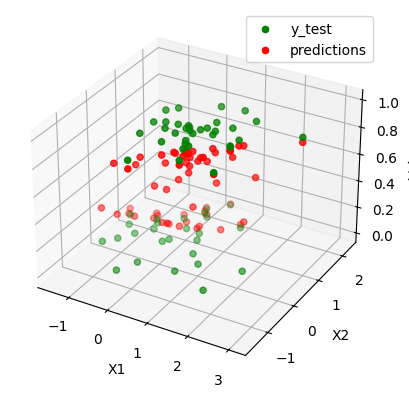

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Prepare the data
x1 = X_test[:, 0]
x2 = X_test[:, 1]
y_test = np.squeeze(y_test)  # Ensure y_test is a 1D array
predictions = np.squeeze(predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for y_test in green
ax.scatter(x1, x2, y_test, c='g', label='y_test')

# Scatter plot for predictions in red
ax.scatter(x1, x2, predictions, c='r', label='predictions')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.legend()

plt.show()


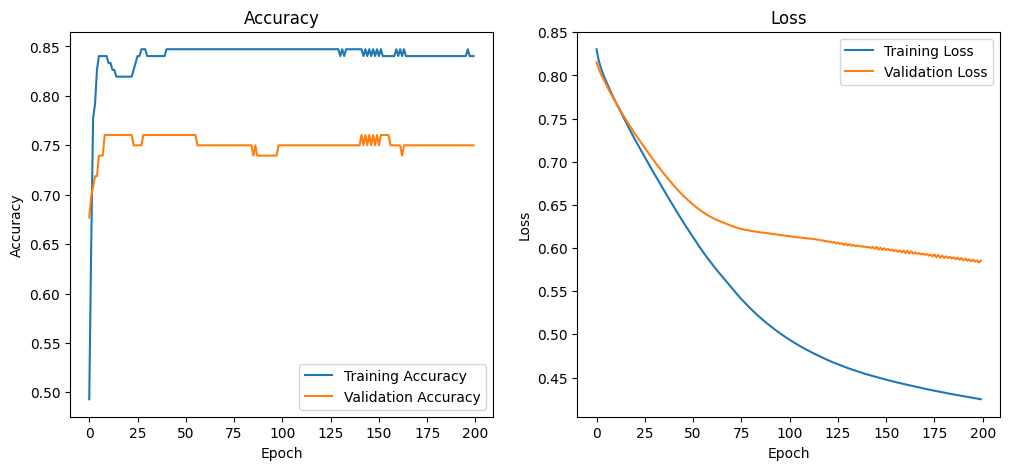

In [66]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy #//# history[...]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_l2_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_l2_reg.history['loss'], label='Training Loss')
plt.plot(history_l2_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [127]:
import numpy as np
layer_output = np.array([1, 2, 3, 4, 5], dtype="int")
initial_layer = layer_output
layer_output *= np.random.randint(low=0, high=2, size=layer_output.shape, dtype="int")
layer_output = layer_output.astype(float)
layer_output

array([1., 0., 0., 4., 0.])

In [128]:
layer_output *= 0.5
layer_output

array([0.5, 0. , 0. , 2. , 0. ])

In [129]:
print(sum(initial_layer))
print(sum(layer_output))

5
2.5


### Dropout Regularization

In [134]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_dropout = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_split=0.4)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5069 - loss: 0.7791 - val_accuracy: 0.3750 - val_loss: 0.7308
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5139 - loss: 0.7569 - val_accuracy: 0.3750 - val_loss: 0.7233
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4653 - loss: 0.7230 - val_accuracy: 0.3750 - val_loss: 0.7174
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5208 - loss: 0.7275 - val_accuracy: 0.3646 - val_loss: 0.7121
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4792 - loss: 0.7317 - val_accuracy: 0.3646 - val_loss: 0.7081
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 0.7469 - val_accuracy: 0.3854 - val_loss: 0.7039
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5694 - loss: 0.6960 - val_accuracy: 0.4062 - val_loss: 0.7001
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5833 - loss: 0.6895 - val_accuracy: 0.4167 - val_loss: 

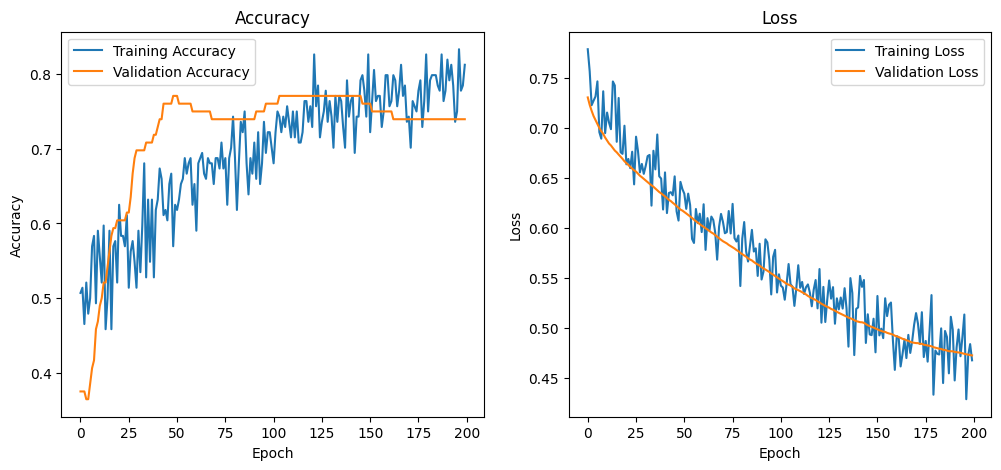

In [135]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Sequential and Functional APIs

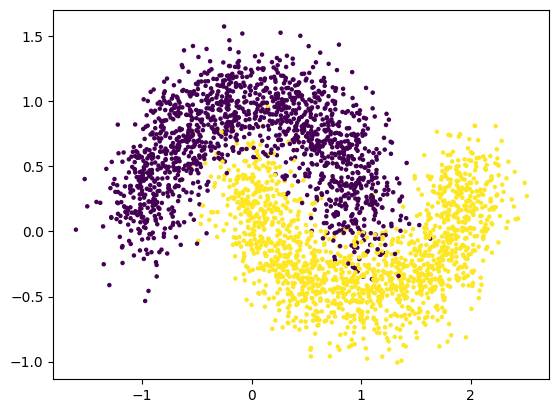

In [165]:
X, y = make_moons(n_samples=3000, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], cmap="viridis", c=y, s=5)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([ #//# sequential model class to build a model
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model = keras.Sequential() #//# incremental building of a model
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.build(input_shape=(None, 3)) #//# None implies any batch size, 3 is the input sample size

In [2]:
model.summary() #//# provide useful data

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model = keras.Sequential([
    layers.Dense(8192, activation="relu", input_shape=(None, 300)), #//# provide input shape of first layer, not required because keras can infer required size
    layers.Dense(8192, activation="relu"),
    layers.Dense(8192, activation="relu"),
    layers.Dense(8192, activation="relu", name="custom layer name"), #//# customize layer names
    layers.Dense(1, activation="softmax")
])

model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

model.summary()

C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, None, 8192)     │     2,465,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, None, 8192)     │    67,117,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, None, 8192)     │    67,117,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom layer name (Dense)       │ (None, None, 8192)     │    67,117,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, None, 1)        │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,825,153 (777.53 MB)

 Trainable params: 203,825,153 (777.53 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#//# multi-input, multi-output functional model
vocabulary_size = 10000
num_tags = 100
num_departments = 4

#input
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features) #//# (features) to apply it to the features tensor

#output
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
#//# doesn't work
# from tensorflow.keras.utils import plot_model

# # Display the model's architecture
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [6]:
import visualkeras #//# visualkeras to visualize model
visualkeras.layered_view(model)

In [8]:
visualkeras.layered_view(model).show() #//# add .show() to render in self window

In [13]:
import visualkeras
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(128, activation='softmax'),
    layers.Dense(1, activation='relu')
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

visualkeras.layered_view(model)


C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


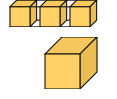

In [14]:
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(model, legend=True, font=font)

In [ ]:
#//# sequential method
model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l1(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2_reg = model.fit(
    X_train, y_train,
    epochs=200, batch_size=512, validation_split=0.4)

#//# functional method
from tensorflow.keras import layers, regularizers, Model, Input

# Define the input layer
inputs = Input(shape=(X_train.shape[1],)) #//# accepts one feature, input is given as vector with 1 feature
#//# input layer is symbolic tensor as contains no data before input

# Define the layers with specified regularizations
x = layers.Dense(32, kernel_regularizer=regularizers.l1(0.002), activation="relu")(inputs) #//# notice how refers to input layer and then will 
x = layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)      #//# refer to the previous layer
x = layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu")(x)

# Output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)


# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_l2_reg = model.fit(
    X_train, y_train,
    epochs=200, batch_size=512,
    validation_split=0.4)

In [ ]:
#//# sequential limited to one input and one output

In [3]:
#//# read the documentation
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 125ms/step - accuracy: 0.1233 - loss: 2.2960 - val_accuracy: 0.2417 - val_loss: 2.2676
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.2012 - loss: 2.2645 - val_accuracy: 0.3685 - val_loss: 2.2273
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.2849 - loss: 2.2263 - val_accuracy: 0.4816 - val_loss: 2.1760
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.3595 - loss: 2.1756 - val_accuracy: 0.5843 - val_loss: 2.1081
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.4271 - loss: 2.1092 - val_accuracy: 0.6485 - val_loss: 2.0158
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.4815 - loss: 2.0162 - val_accuracy: 0.6822 - val_loss: 1.8914
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.5272 - loss: 1.8966 - val_accuracy: 0.7130 - val_loss: 1.7325
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.5578 - loss: 1

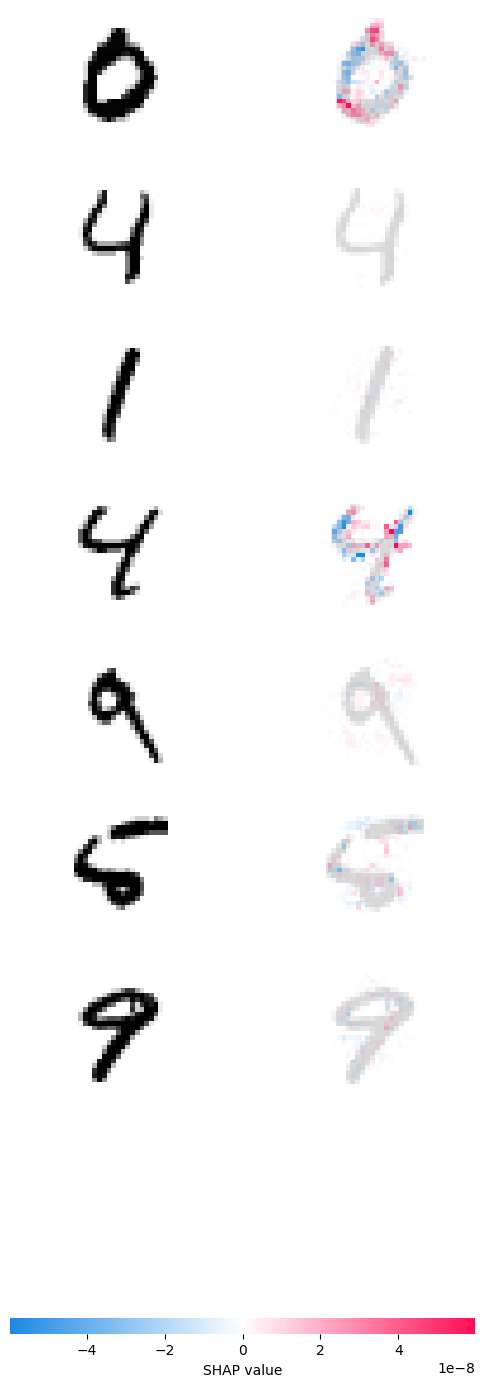

In [5]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[3:10])
shap.image_plot(shap_values, -x_test[3:10])

In [ ]:
#//# verbose = 0 (hidden), verbose = 1 (prograss bar), verbose = 2 (epoch)

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

# Define inputs
title_input = Input(shape=(vocabulary_size,))
text_body_input = Input(shape=(vocabulary_size,))
tags_input = Input(shape=(num_tags,))

# Define model architecture
x1 = Dense(64, activation='relu')(title_input)
x2 = Dense(64, activation='relu')(text_body_input)
x3 = Dense(32, activation='relu')(tags_input)

# Concatenate features
concatenated = Concatenate()([x1, x2, x3])

# Define output layers
priority_output = Dense(1, name='priority')(concatenated)
department_output = Dense(num_departments, activation='softmax', name='department')(concatenated)

# Create and compile model
model = Model(inputs=[title_input, text_body_input, tags_input],
              outputs=[priority_output, department_output])

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, #//# setup different loss measures
              metrics={"priority": "mean_absolute_error", "department": "accuracy"})

# Fit the model
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

# Evaluate the model
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

# Predict
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - department_accuracy: 0.1711 - loss: 570.4825 - priority_mean_absolute_error: 8.1288
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.1286 - loss: 11.3798 - priority_mean_absolute_error: 2.4864
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


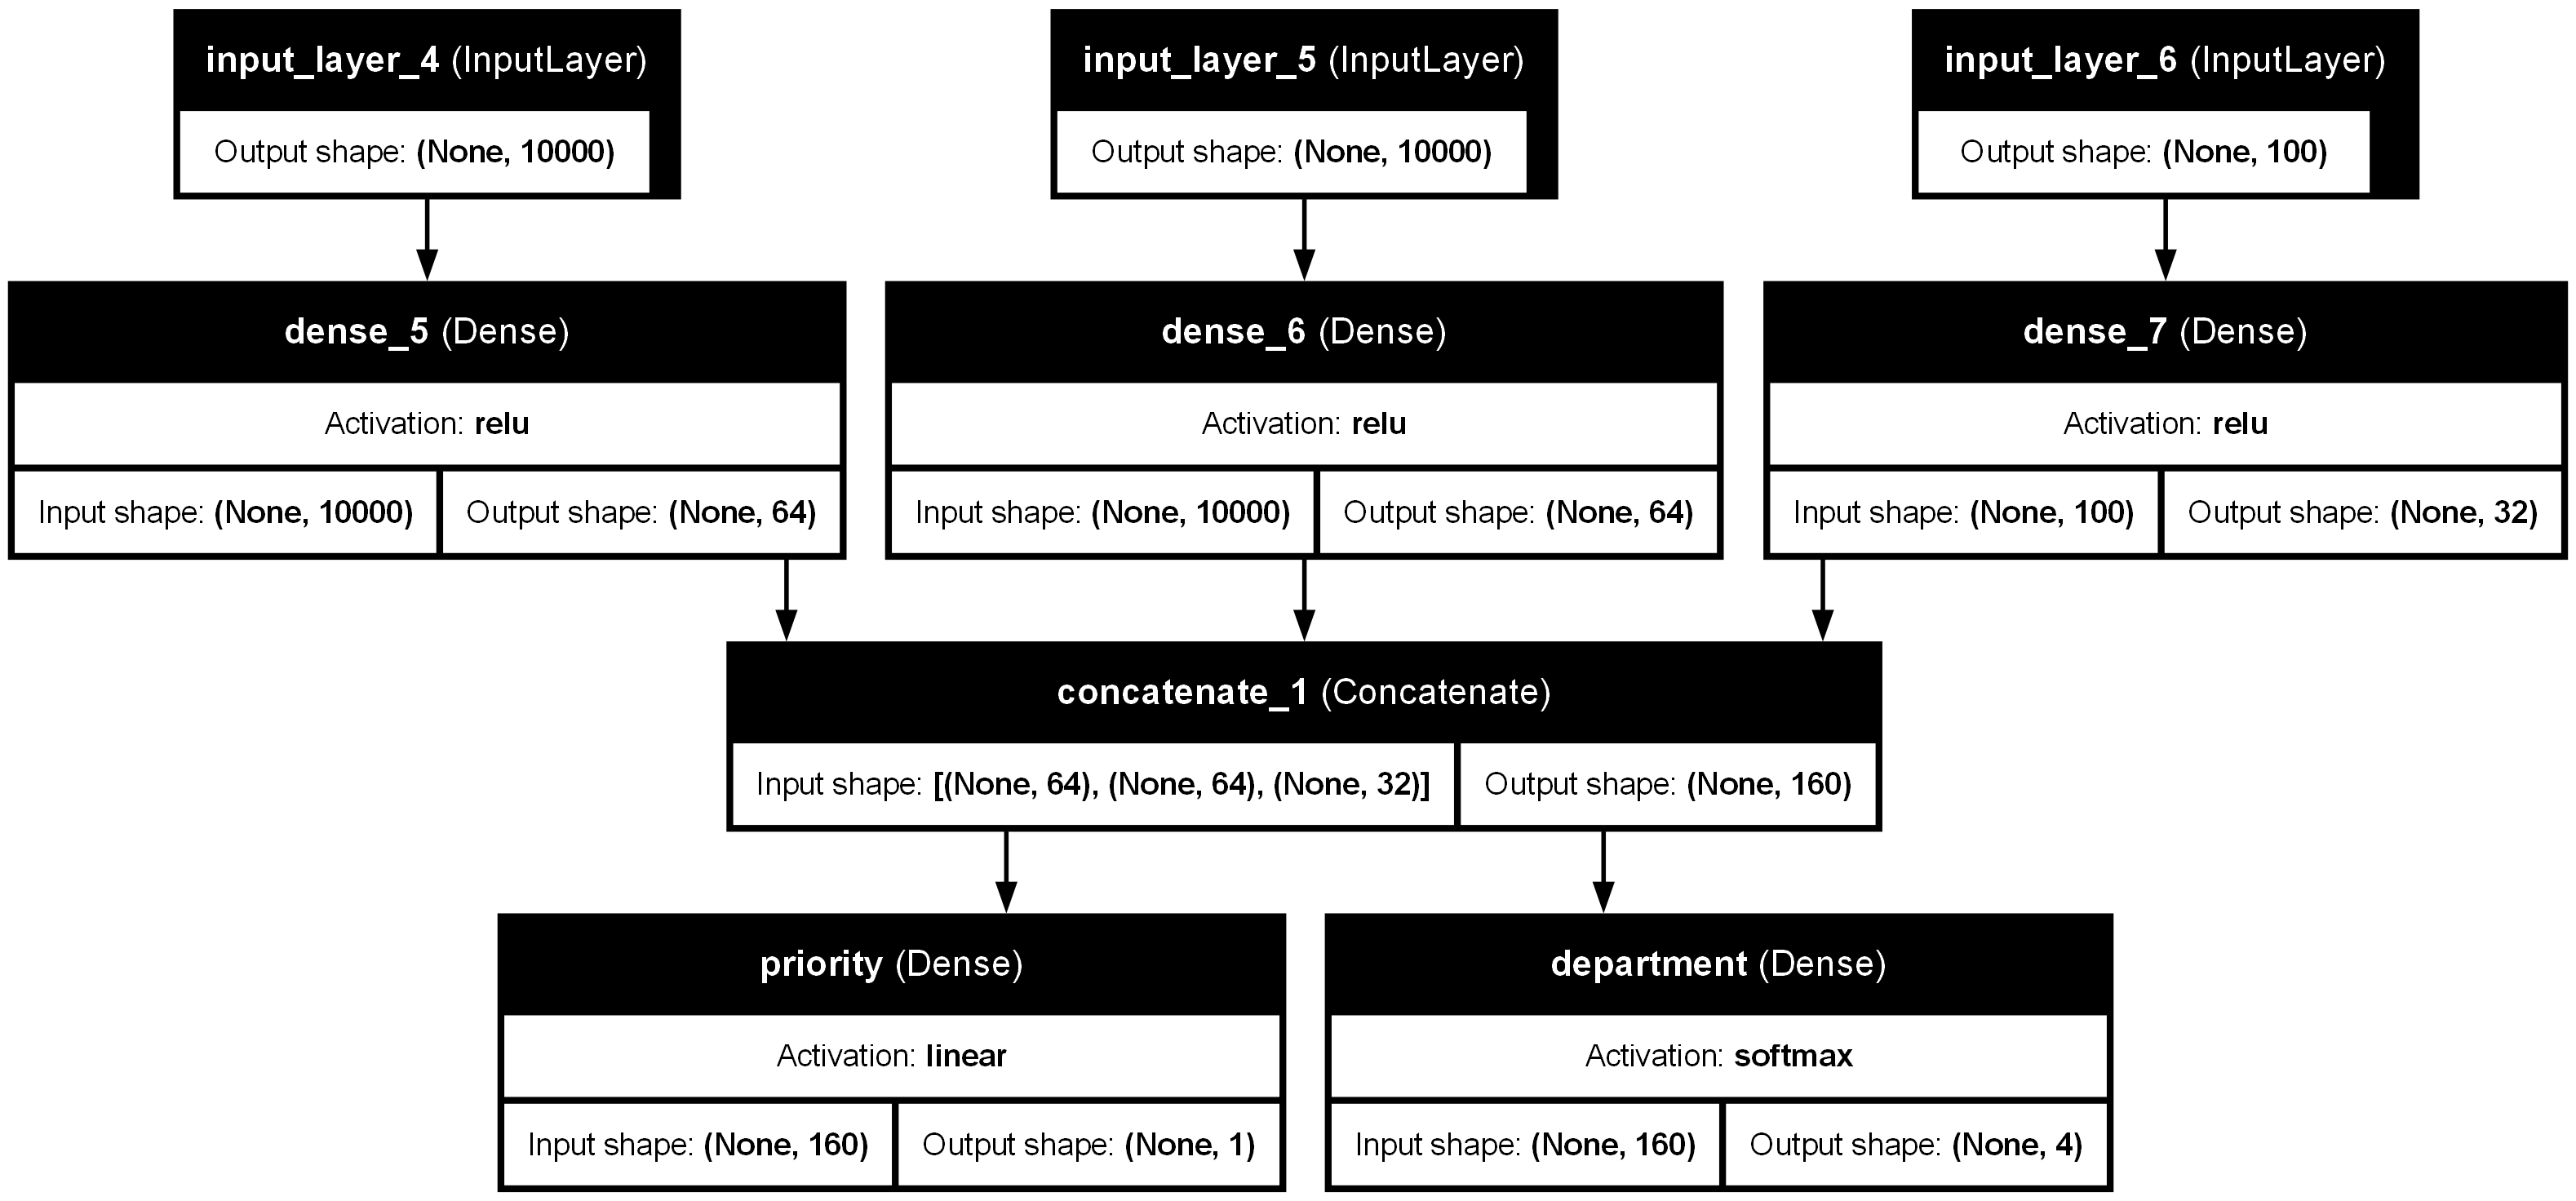

In [13]:
keras.utils.plot_model(model, "ticket_classifier.png",
                       show_shapes=True, #//# input shape size
                       show_layer_names=True, #//# layer name
                       show_layer_activations=True, #//# activation functions
                       )

In [22]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)

    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8634 - loss: 0.4526 - val_accuracy: 0.9541 - val_loss: 0.1563
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9511 - loss: 0.1637 - val_accuracy: 0.9693 - val_loss: 0.1087
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9644 - loss: 0.1236 - val_accuracy: 0.9724 - val_loss: 0.1031
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9703 - loss: 0.1095 - val_accuracy: 0.9760 - val_loss: 0.0967
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9723 - loss: 0.1008 - val_accuracy: 0.9765 - val_loss: 0.0904
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9750 - loss: 0.0916 - val_accuracy: 0.9769 - val_loss: 0.0994
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9771 - loss: 0.0864 - val_accuracy: 0.9783 - val_loss: 0.0921
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9774 - loss: 0

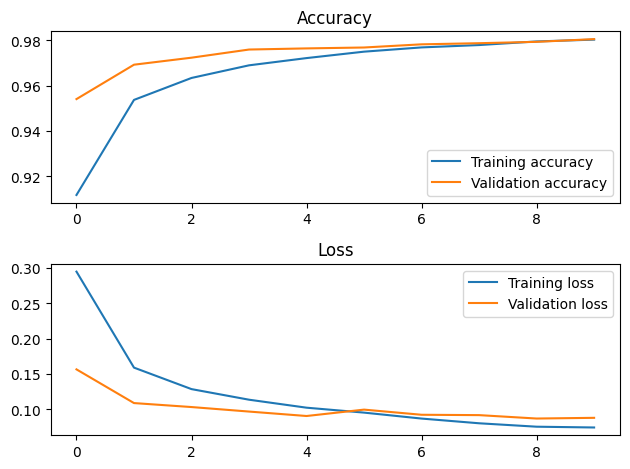

In [24]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
test_metrics = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9771 - loss: 0.0961


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


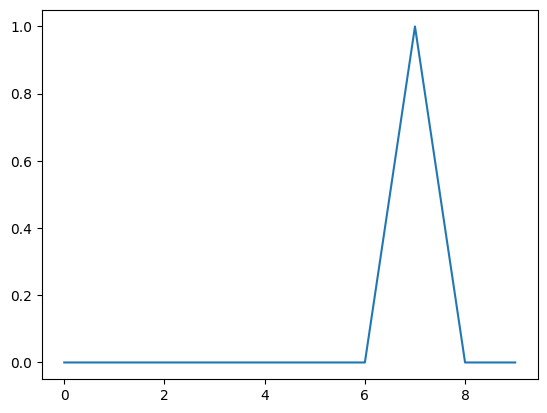

In [28]:
predictions = model.predict(test_images)
plt.plot(predictions[0])
plt.show()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8610 - loss: 0.4581 - rmse: 0.4423 - val_accuracy: 0.9592 - val_loss: 0.1449 - val_rmse: 0.2508
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9531 - loss: 0.1603 - rmse: 0.2668 - val_accuracy: 0.9679 - val_loss: 0.1129 - val_rmse: 0.2217
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9628 - loss: 0.1329 - rmse: 0.2404 - val_accuracy: 0.9723 - val_loss: 0.1051 - val_rmse: 0.2073
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9695 - loss: 0.1139 - rmse: 0.2184 - val_accuracy: 0.9748 - val_loss: 0.0998 - val_rmse: 0.2007
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9723 - loss: 0.0989 - rmse: 0.2059 - val_accuracy: 0.9766 - val_loss: 0.0930 - val_rmse: 0.1941
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9752 - loss: 0.0870 - rmse: 0.1955 - val_accuracy: 0.9767 - val_loss: 0.0916 - val_rmse: 0.1893
Epoch 7/10

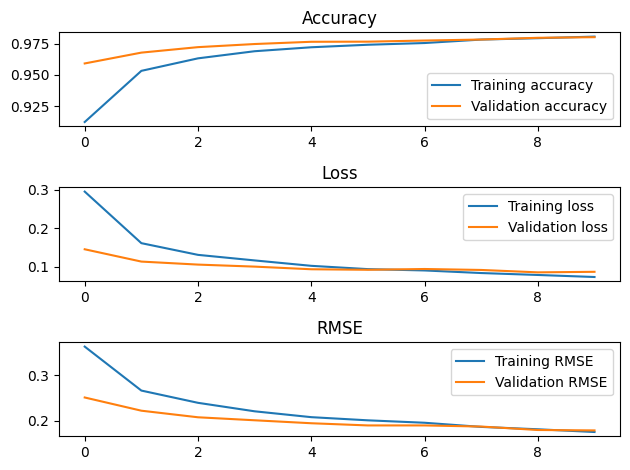

In [41]:
#//# model subclassing own metrics
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Downloading data (MNIST dataset)
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

# Creating model
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    
    features = layers.Dense(512, activation="relu")(inputs) #//# build the model using functional api
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)

    model = keras.Model(inputs, outputs)
    return model

# Creating error metric
class RootMeanSquaredError(keras.metrics.Metric): #//# custom metric class
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

# Training
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()]) #//# compile model with custom metric
history = model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

# Plotting history
import matplotlib.pyplot as plt

plt.subplot(3, 1, 1)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(history.history['rmse'], label="Training RMSE")
plt.plot(history.history['val_rmse'], label="Validation RMSE")
plt.title("RMSE")
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
#//# model subclassing callbacks to trigger specific actions at some points during training, used to gain control during training

callbacks_list = [
    keras.callbacks.EarlyStopping( #//# when validation accuracy didn't improve for two epochs stops training
        monitor="val_accuracy",
        patience=2,
        ),
    keras.callbacks.ModelCheckpoint( #//# save best model to date
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
    ]

model = get_mnist_model()

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.fit(train_images, train_labels,
    epochs=10,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels)
    )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8644 - loss: 0.4440 - val_accuracy: 0.9565 - val_loss: 0.1479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9513 - loss: 0.1667 - val_accuracy: 0.9649 - val_loss: 0.1221
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9626 - loss: 0.1368 - val_accuracy: 0.9729 - val_loss: 0.1075
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9675 - loss: 0.1114 - val_accuracy: 0.9735 - val_loss: 0.1019
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9694 - loss: 0.1064 - val_accuracy: 0.9764 - val_loss: 0.0912
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9735 - loss: 0.0961 - val_accuracy: 0.9777 - val_loss: 0.0941
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9750 - loss: 0.0928 - val_accuracy: 0.9778 - val_loss: 0.0893
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9786 - loss: 0

In [45]:
model.save('checkpoint.h5') #//# save a model

In [46]:
model = keras.models.load_model("checkpoint_path.keras") #//# import model

In [50]:
#//# custom callback
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Epoch {epoch} started.")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch} ended.\nLogs: {logs}")
    
    def on_batch_begin(self, batch, logs=None):
        print(f"Batch {batch} started.")
    
    def on_batch_end(self, batch, logs=None):
        print(f"Batch {batch} ended.\nLogs: {logs}")
    
    def on_train_begin(self, logs=None):
        print("Training started.")
    
    def on_train_end(self, logs=None):
        print(f"Training ended.\nLogs: {logs}")

callbacks_list = [
    CustomCallback()
    ]

model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels,
                    epochs=1,
                    callbacks=callbacks_list,
                    validation_data=(val_images, val_labels))

Training started.
Epoch 0 started.
Batch 0 started.
Batch 0 ended.
Logs: {'accuracy': 0.09375, 'loss': 2.459892988204956}
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 19:46 760ms/step - accuracy: 0.0938 - loss: 2.4599Batch 1 started.
Batch 1 ended.
Logs: {'accuracy': 0.109375, 'loss': 2.3389196395874023}
Batch 2 started.
Batch 2 ended.
Logs: {'accuracy': 0.1875, 'loss': 2.1862411499023438}
Batch 3 started.
Batch 3 ended.
Logs: {'accuracy': 0.1875, 'loss': 2.1324617862701416}
Batch 4 started.
Batch 4 ended.
Logs: {'accuracy': 0.23749999701976776, 'loss': 2.0545573234558105}
Batch 5 started.
Batch 5 ended.
Logs: {'accuracy': 0.265625, 'loss': 1.9991788864135742}
Batch 6 started.
Batch 6 ended.
Logs: {'accuracy': 0.3214285671710968, 'loss': 1.9136263132095337}
Batch 7 started.
Batch 7 ended.
Logs: {'accuracy': 0.359375, 'loss': 1.8631948232650757}
Batch 8 started.
Batch 8 ended.
Logs: {'accuracy': 0.3888888955116272, 'loss': 1.8006867170333862}
   9/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2

In [52]:
from tensorflow.python.client import device_lib #//# tensorflow local devices
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11048365479200818308
xla_global_id: -1
]


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8624 - loss: 0.4511 - val_accuracy: 0.9594 - val_loss: 0.1413
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9514 - loss: 0.1678 - val_accuracy: 0.9687 - val_loss: 0.1135
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9618 - loss: 0.1331 - val_accuracy: 0.9722 - val_loss: 0.1003
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9669 - loss: 0.1234 - val_accuracy: 0.9745 - val_loss: 0.0950
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9732 - loss: 0.0997 - val_accuracy: 0.9752 - val_loss: 0.0970
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9737 - loss: 0.0953 - val_accuracy: 0.9759 - val_loss: 0.0984
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9765 - loss: 0.0873 - val_accuracy: 0.9782 - val_loss: 0.0870
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9789 - loss: 0

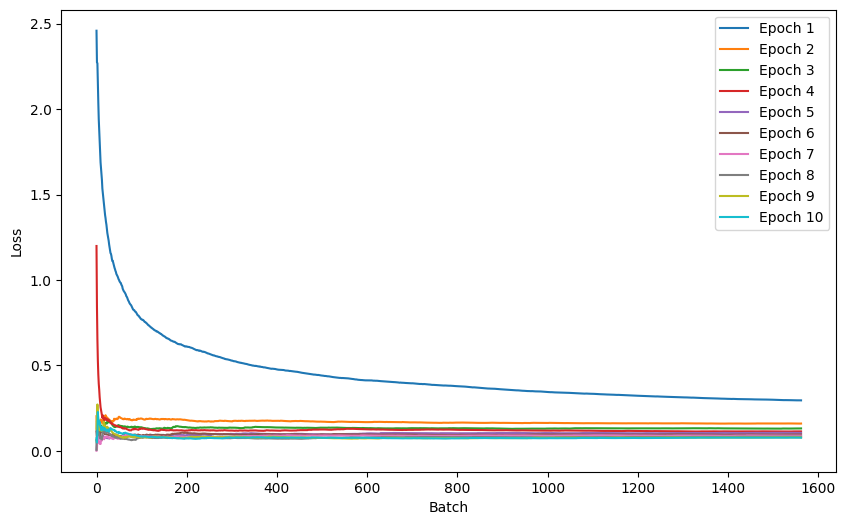

In [61]:
from matplotlib import pyplot as plt
from tensorflow import keras

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.per_batch_losses = []
        self.epochs_losses = []

    def on_batch_end(self, batch, logs=None):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_losses.append(self.per_batch_losses.copy())
        self.per_batch_losses = []

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        for epoch, losses in enumerate(self.epochs_losses):
            plt.plot(range(len(losses)), losses, label=f"Epoch {epoch+1}")
        plt.xlabel("Batch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

# Example usage
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))


In [68]:
#//# tensorboard
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

tensorboard = keras.callbacks.TensorBoard( #//# tensorboard callback
    log_dir='./tensorboard',  # Adjust to absolute path if needed
)

model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard]
)
#//# tensorboard --logdir=absolute/path/to/tensorboard

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8643 - loss: 0.4526 - val_accuracy: 0.9591 - val_loss: 0.1425
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9528 - loss: 0.1640 - val_accuracy: 0.9717 - val_loss: 0.1050
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9655 - loss: 0.1258 - val_accuracy: 0.9728 - val_loss: 0.1011
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9692 - loss: 0.1106 - val_accuracy: 0.9746 - val_loss: 0.0938
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9718 - loss: 0.0974 - val_accuracy: 0.9763 - val_loss: 0.0945
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9764 - loss: 0.0878 - val_accuracy: 0.9785 - val_loss: 0.0865
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9761 - loss: 0.0852 - val_accuracy: 0.9787 - val_loss: 0.0876
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9786 - loss: 0

In [ ]:
#//# custom learning rate
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def __init__(self, base_lr):
        super().__init__()
        self.base_lr = base_lr

    def on_epoch_begin(self, epoch, logs=None):
        new_lr = self.base_lr * (epoch + 1)  # Multiply base_lr by the current epoch (epoch starts from 0)
        self.model.optimizer.lr.assign(new_lr)  # Update the learning rate
        print(f"Epoch {epoch + 1} started. New learning rate: {new_lr}")

    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} ended.\nLogs: {logs}")

    # Keep the other methods unchanged if needed

# Usage:
# custom_callback = CustomCallback(base_lr=0.001)


In [ ]:
#//# 
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

class LocalResponseNorm(BaseEstimator, TransformerMixin):
    def __init__(self, depth_radius=2, bias=1.0, alpha=1e-4, beta=0.75):
        self.depth_radius = depth_radius
        self.bias = bias
        self.alpha = alpha
        self.beta = beta

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        squared_X = np.square(X)
        scale = self.bias
        for i in range(self.depth_radius):
            scale += self.alpha * np.roll(squared_X, i, axis=1)
        scale = np.power(scale, -self.beta)
        return X * scale

# Example pipeline
pipeline = Pipeline([
    ('lrn', LocalResponseNorm()),
    ('clf', SVC())
])

# Now you can fit the pipeline
# pipeline.fit(X_train, y_train)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Example pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Fit the pipeline
# pipeline.fit(X_train, y_train)

#//# standard scaler is z-score normalization?

Object `normalization` not found.
